# 🚀 Exploración, Análisis, Limpieza y Visualización de "Proyecto Aurelion"

Este notebook tiene por finalidad llevar a cabo el proceso de análisis, limpieza y transformación de las bases de datos de la tienda Aurelion para su correcto uso en exploraciones de datos con la finalidad de resolver planteamientos que ayuden al negocio.

## ✅ Paso 1: Instalar e importar librerías necesarias

In [171]:
#Importación de Librerías

import pandas as pd
from dateutil import parser
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para ver todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Configuración de visualización
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## 🔍 Paso 2: Exploración de los datos

In [172]:
# Cargar archivos
clientes = pd.read_excel('Clientes.xlsx')
productos = pd.read_excel('Productos.xlsx')
ventas = pd.read_excel('Ventas.xlsx')
detalle_ventas = pd.read_excel('Detalle_ventas.xlsx')

#Visualización de los primeros 5 registros de cada archivo

print('🧑 CLIENTES:')
#print(f'   {list(clientes.columns)}\n')
display(clientes.head())

print('\n📦 PRODUCTOS:')
display(productos.head())

print('\n💰 VENTAS:')
display(ventas.head())

print('\n📋 DETALLE VENTAS:')
display(detalle_ventas.head())

🧑 CLIENTES:


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05



📦 PRODUCTOS:


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777



💰 VENTAS:


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta



📋 DETALLE VENTAS:


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902.0,2902.0
1,2,82,Aceitunas Negras 200g,5,2394.0,11970.0
2,2,39,Helado Vainilla 1L,5,469.0,2345.0
3,2,70,Fernet 750ml,2,NaN,8122.0
4,2,22,Medialunas de Manteca,1,2069.0,2069.0


## 🎯 Paso 3: Identificar y limpiar valores nulos

In [173]:
#Identificación de valores nulos

print('🧑 CLIENTES:')
print('\nValores nulos por columna:')
print(clientes.isnull().sum())

print('\n📦 PRODUCTOS:')
print('\nValores nulos por columna:')
print(productos.isnull().sum())

print('\n💰 VENTAS:')
print('\nValores nulos por columna:')
print(ventas.isnull().sum())

print('\n📋 DETALLE VENTAS:')
print('\nValores nulos por columna:')
print(detalle_ventas.isnull().sum())


🧑 CLIENTES:

Valores nulos por columna:
id_cliente        0
nombre_cliente    0
email             0
ciudad            0
fecha_alta        0
dtype: int64

📦 PRODUCTOS:

Valores nulos por columna:
id_producto        0
nombre_producto    0
categoria          0
precio_unitario    0
dtype: int64

💰 VENTAS:

Valores nulos por columna:
id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64

📋 DETALLE VENTAS:

Valores nulos por columna:
id_venta           0
id_producto        0
nombre_producto    0
cantidad           0
precio_unitario    2
importe            1
dtype: int64


In [174]:
#Validación de datos nulos (TRUE)
# Filtrar filas con al menos un valor nulo
registros_nulos = detalle_ventas[detalle_ventas.isnull().any(axis=1)]

# Mostrar los registros nulos
print(f"Total de registros con valores nulos: {len(registros_nulos)}")
display(registros_nulos)
# print(type(registros_nulos))

Total de registros con valores nulos: 2


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
3,2,70,Fernet 750ml,2,NaN,8122.0
19,8,68,Vino Blanco 750ml,5,NaN,NaN


### Limpiar valores nulos

**Estrategias comunes:**
- Eliminar filas con valores nulos (si son pocas)
- Rellenar con valores por defecto
- Rellenar con la media/mediana/otro (para números)

Se aprecia que solamente la tabla "DETALLE_VENTAS" posee valores nulos en las columnas "precio_unitario" e "importe" por lo que procedemos a eliminar o rellenar dichos registros

In [175]:
# DETALLE VENTAS: Eliminar filas con valores nulos
print('\n📋 DETALLE VENTAS:')
detalle_ventas_limpio = detalle_ventas.dropna(axis=0)
print(f'Detalle Ventas: {len(detalle_ventas)} → {len(detalle_ventas_limpio)} filas')

#Indicamos que los sets de datos restantes están libres de nulos

clientes_limpio = clientes
print(f'Clientes: {len(clientes)} → {len(clientes_limpio)} filas')

productos_limpio = productos
print(f'Productos: {len(productos)} → {len(productos_limpio)} filas')

ventas_limpio = ventas
print(f'Ventas: {len(ventas)} → {len(ventas_limpio)} filas')




📋 DETALLE VENTAS:


Detalle Ventas: 343 → 341 filas
Clientes: 100 → 100 filas
Productos: 100 → 100 filas
Ventas: 120 → 120 filas


## 🚧 Paso 4: Identificar y Eliminar registros duplicados

In [176]:
print('🧑 CLIENTES:')
print(f'Total duplicados: {clientes_limpio.duplicated().sum()}')

print('\n📦 PRODUCTOS:')
print(f'Total duplicados: {productos_limpio.duplicated().sum()}')

print('\n💰 VENTAS:')
print(f'Total duplicados: {ventas_limpio.duplicated().sum()}')

print('\n📋 DETALLE VENTAS:')
print(f'Total duplicados: {detalle_ventas_limpio.duplicated().sum()}')

🧑 CLIENTES:
Total duplicados: 0

📦 PRODUCTOS:
Total duplicados: 0

💰 VENTAS:
Total duplicados: 0

📋 DETALLE VENTAS:
Total duplicados: 0


No se presentan valores duplicados

## ✅ Paso 5 Validar y estandarizar

Porcedemos a explorar y validar que : 
* los tipos de datos coincidan con el contenido
* los nombres de las columnas estén en el formato correcto
* los datos tengan el formato correcto

In [177]:
print('🧑 CLIENTES:')
print('\nInformación general:')
clientes_limpio.info()
display(clientes_limpio.head())




🧑 CLIENTES:

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      100 non-null    int64         
 1   nombre_cliente  100 non-null    object        
 2   email           100 non-null    object        
 3   ciudad          100 non-null    object        
 4   fecha_alta      100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.0+ KB


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05


Tabla Clientes:  
Tipos de datos : Todos son correctos respecto a su contenido  
Nombres de columnas: Todos se encuentran en minusculas y separados por guiones  
Contenido: El contenido está en el formato correcto a su tipo de dato


In [178]:
print('📦 PRODUCTOS:')
print('\nInformación general:')
productos_limpio.info()
display(productos_limpio.head())

📦 PRODUCTOS:

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_producto      100 non-null    int64 
 1   nombre_producto  100 non-null    object
 2   categoria        100 non-null    object
 3   precio_unitario  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777


Tabla Productos:  
Tipos de datos : Todos son correctos respecto a su contenido  
Nombres de columnas: Todos se encuentran en minusculas y separados por guiones  
Contenido: El contenido está en el formato correcto a su tipo de dato


In [179]:
print('\n💰 VENTAS:')
print('\nInformación general:')
ventas_limpio.info()
display(ventas_limpio.head())


💰 VENTAS:

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        120 non-null    int64         
 1   fecha           120 non-null    datetime64[ns]
 2   id_cliente      120 non-null    int64         
 3   nombre_cliente  120 non-null    object        
 4   email           120 non-null    object        
 5   medio_pago      120 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.8+ KB


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta


Tabla Ventas:  
Tipos de datos : Todos son correctos respecto a su contenido  
Nombres de columnas: Todos se encuentran en minusculas y separados por guiones  
Contenido: El contenido está en el formato correcto a su tipo de dato


In [180]:
print('\n📋 DETALLE VENTAS:')
print('\nInformación general:')
detalle_ventas_limpio.info()
display(detalle_ventas_limpio.head())


📋 DETALLE VENTAS:

Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 342
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         341 non-null    int64  
 1   id_producto      341 non-null    int64  
 2   nombre_producto  341 non-null    object 
 3   cantidad         341 non-null    int64  
 4   precio_unitario  341 non-null    float64
 5   importe          341 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 18.6+ KB


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902.0,2902.0
1,2,82,Aceitunas Negras 200g,5,2394.0,11970.0
2,2,39,Helado Vainilla 1L,5,469.0,2345.0
4,2,22,Medialunas de Manteca,1,2069.0,2069.0
5,2,79,Hamburguesas Congeladas x4,4,2420.0,9680.0


Tabla Detalle de Ventas:  
Tipos de datos : Todos son correctos respecto a su contenido  
Nombres de columnas: Todos se encuentran en minusculas y separados por guiones  
Contenido: El contenido está en el formato correcto a su tipo de dato


## 💡 Paso 6: Normalización de datos numéricos

Existen 3 formas:
1. Escalamiento Simple
    - obtener valor nuevo = Valor actual / Valor máximo
2. Míninos y máximos
    - obtener valor nuevo = (Valor actual-Valor mínimo) / (Valor máximo-valor mínimo)
3. Z-score (más utilizada)
    - btener valor nuevo = (Valor-media)/desviación estándar

In [181]:
# Clientes
print(f'\nTABLA: Clientes\n {clientes_limpio.dtypes} ')
clientes_limpio.head(3)



TABLA: Clientes
 id_cliente                 int64
nombre_cliente            object
email                     object
ciudad                    object
fecha_alta        datetime64[ns]
dtype: object 


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03


En la tabla de CLIENTES El identificador de CLIENTE no es un valor que se deba normalizar debido a su naturaleza ya que si bien es un número entero no se utiliza como medida si no como identificador(etiqueta numérica) para distinguir registro únicos.

In [182]:
# Productos
print(f'\nTABLA: Productos\n {productos_limpio.dtypes} ')
productos_limpio.head(3)


TABLA: Productos
 id_producto         int64
nombre_producto    object
categoria          object
precio_unitario     int64
dtype: object 


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964


En la tabla de PRODUCTOS Se aprecian los precios unitarios como valores que pueden ser normalizados, por lo que procedemos a aplicar la normalización z-score

In [183]:
productos_limpio['precio_unitario_normalizado']=(productos_limpio['precio_unitario']-productos_limpio['precio_unitario'].mean())/productos_limpio['precio_unitario'].std()
print("Max precio unitario normalizado: ",productos_limpio['precio_unitario_normalizado'].max())
print("Min precio unitario normalizado: ",productos_limpio['precio_unitario_normalizado'].min())
print("Max precio unitario : ",productos_limpio['precio_unitario'].max())
print("Min precio unitario : ",productos_limpio['precio_unitario'].min())
productos_limpio

Max precio unitario normalizado:  1.6382398164599636
Min precio unitario normalizado:  -1.770763932474817
Max precio unitario :  4982
Min precio unitario :  272


,id_producto,nombre_producto,categoria,precio_unitario,precio_unitario_normalizado
0,1,Coca Cola 1.5L,Alimentos,2347,-0.268920
1,2,Pepsi 1.5L,Limpieza,4973,1.631726
2,3,Sprite 1.5L,Alimentos,4964,1.625212
3,4,Fanta Naranja 1.5L,Limpieza,2033,-0.496187
4,5,Agua Mineral 500ml,Alimentos,4777,1.489865
...,...,...,...,...,...
95,96,Suavizante 1L,Limpieza,4920,1.593365
96,97,Limpiavidrios 500ml,Alimentos,872,-1.336496
97,98,Desengrasante 500ml,Limpieza,2843,0.090074
98,99,Esponjas x3,Alimentos,2430,-0.208847


In [184]:
# Ventas
print(f'\nTABLA: Ventas\n {ventas_limpio.dtypes} ')
ventas_limpio.head(3)


TABLA: Ventas
 id_venta                   int64
fecha             datetime64[ns]
id_cliente                 int64
nombre_cliente            object
email                     object
medio_pago                object
dtype: object 


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta


En la tabla de VENTAS los identificadores de venta y cliente no son valores que se deban normalizar debido a su naturaleza ya que si bien son del tipo número entero no se utilizan como medida si no como identificadores(etiqueta numérica) para distinguir registro únicos.

In [185]:
# Detalle Ventas
print(f'\nTABLA: Detalle Ventas\n {detalle_ventas_limpio.dtypes} ')
detalle_ventas_limpio.head(3)



TABLA: Detalle Ventas
 id_venta             int64
id_producto          int64
nombre_producto     object
cantidad             int64
precio_unitario    float64
importe            float64
dtype: object 


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902.0,2902.0
1,2,82,Aceitunas Negras 200g,5,2394.0,11970.0
2,2,39,Helado Vainilla 1L,5,469.0,2345.0


En la tabla de DETALLE VENTAS Se aprecian los precios unitarios y los importes y las cantidades como valores que pueden ser normalizados, por lo que procedemos a aplicar la normalización z-score.

In [186]:
#CANTIDAD
detalle_ventas_limpio.loc[:,'cantidad_normalizado']=round((detalle_ventas_limpio['cantidad']-detalle_ventas_limpio['cantidad'].mean())/detalle_ventas_limpio['cantidad'].std(),2)
print("🔛Media cantidad: ",round(detalle_ventas_limpio['cantidad'].mean(),2))
print("🔀Desviación estándar cantidad: ",round(detalle_ventas_limpio['cantidad'].std(),2))
print("⏫Max cantidad normalizado: ",round(detalle_ventas_limpio['cantidad_normalizado'].max()),2)
print("⏬Min cantidad normalizado: ",round(detalle_ventas_limpio['cantidad_normalizado'].min(),2))
print("⏫Max cantidad : ",detalle_ventas_limpio['cantidad'].max())
print("⏬Min cantidad : ",detalle_ventas_limpio['cantidad'].min())
print("*"*50)

#Normalización del Precio unitario
detalle_ventas_limpio.loc[:,'precio_unitario_normalizado']=round((detalle_ventas_limpio['precio_unitario']-detalle_ventas_limpio['precio_unitario'].mean())/detalle_ventas_limpio['precio_unitario'].std(),2)
print("🔛Media precio unitario: ",round(detalle_ventas_limpio['precio_unitario'].mean(),2))
print("🔀Desviación estándar precio unitario: ",round(detalle_ventas_limpio['precio_unitario'].std(),2))
print("⏫Max precio unitario normalizado: ",round(detalle_ventas_limpio['precio_unitario_normalizado'].max()),2)
print("⏬Min precio unitario normalizado: ",round(detalle_ventas_limpio['precio_unitario_normalizado'].min(),2))
print("⏫Max precio unitario : ",detalle_ventas_limpio['precio_unitario'].max())
print("⏬Min precio unitario : ",detalle_ventas_limpio['precio_unitario'].min())
print("*"*50)

#Normalización del importe
detalle_ventas_limpio.loc[:,'importe_normalizado']=round((detalle_ventas_limpio['importe']-detalle_ventas_limpio['importe'].mean())/detalle_ventas_limpio['importe'].std(),2)
print("🔛Media importe: ",round(detalle_ventas_limpio['importe'].mean(),2))
print("🔀Desviación estándar importe: ",round(detalle_ventas_limpio['importe'].std(),2))
print("⏫Max importe normalizado: ",round(detalle_ventas_limpio['importe_normalizado'].max(),2))
print("⏬Min importe normalizado: ",round(detalle_ventas_limpio['importe_normalizado'].min(),2))
print("⏫Max importe : ",detalle_ventas_limpio['importe'].max())
print("⏬Min importe : ",detalle_ventas_limpio['importe'].min())
print("*"*50)

detalle_ventas_limpio.head()

🔛Media cantidad:  2.96
🔀Desviación estándar cantidad:  1.36
⏫Max cantidad normalizado:  2 2
⏬Min cantidad normalizado:  -1.44
⏫Max cantidad :  5
⏬Min cantidad :  1
**************************************************
🔛Media precio unitario:  2650.28
🔀Desviación estándar precio unitario:  1310.31
⏫Max precio unitario normalizado:  2 2
⏬Min precio unitario normalizado:  -1.82
⏫Max precio unitario :  4982.0
⏬Min precio unitario :  272.0
**************************************************
🔛Media importe:  7712.24
🔀Desviación estándar importe:  5271.91
⏫Max importe normalizado:  3.25
⏬Min importe normalizado:  -1.41
⏫Max importe :  24865.0
⏬Min importe :  272.0
**************************************************


/tmp/ipykernel_7280/1700763693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detalle_ventas_limpio.loc[:,'cantidad_normalizado']=round((detalle_ventas_limpio['cantidad']-detalle_ventas_limpio['cantidad'].mean())/detalle_ventas_limpio['cantidad'].std(),2)
/tmp/ipykernel_7280/1700763693.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detalle_ventas_limpio.loc[:,'precio_unitario_normalizado']=round((detalle_ventas_limpio['precio_unitario']-detalle_ventas_limpio['precio_unitario'].mean())/detalle_ven

,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe,cantidad_normalizado,precio_unitario_normalizado,importe_normalizado
0,1,90,Toallas Húmedas x50,1,2902.0,2902.0,-1.44,0.19,-0.91
1,2,82,Aceitunas Negras 200g,5,2394.0,11970.0,1.50,-0.20,0.81
2,2,39,Helado Vainilla 1L,5,469.0,2345.0,1.50,-1.66,-1.02
4,2,22,Medialunas de Manteca,1,2069.0,2069.0,-1.44,-0.44,-1.07
5,2,79,Hamburguesas Congeladas x4,4,2420.0,9680.0,0.76,-0.18,0.37


## 📉 Paso 7: Calculo de estadisticas basicas

Los catálogos de productos y clientes no podrán mostrar información que muestre el comportamiento de las ventas, y el catálogo de ventas contiene solo un dato numérico (importe) mismo que también podemos apreciar en el detalle de las ventas, por lo que nos enfocaremos en sacar las estadísticas básicas de la tabla que contiene el detalle de las ventas(excluyendo los identificadores de venta y producto debido a que no aportan información valiosa).

In [187]:
estadisticas = detalle_ventas_limpio.drop(columns=['id_venta','id_producto']).describe()
estadisticas

,cantidad,precio_unitario,importe,cantidad_normalizado,precio_unitario_normalizado,importe_normalizado
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,2.958944,2650.284457,7712.243402,-0.000029,-0.000117,0.000323
std,1.364923,1310.312073,5271.911009,1.001568,1.000630,1.000177
min,1.000000,272.000000,272.000000,-1.440000,-1.820000,-1.410000
25%,2.000000,1592.000000,3488.000000,-0.700000,-0.810000,-0.800000
50%,3.000000,2512.000000,6702.000000,0.030000,-0.110000,-0.190000
75%,4.000000,3876.000000,10227.000000,0.760000,0.940000,0.480000
max,5.000000,4982.000000,24865.000000,1.500000,1.780000,3.250000


**Las medidas de posición son:**

* **count:** cuántos registros tiene cada columna numérica.  
* **mean:** el promedio.  
* **std:** la desviación estándar (qué tanto varían los datos).  
* **min:** el valor mínimo  
* **cuartiles:** 25%, 50%, 75%  
* **max:** el valor máximo 
* **rango:** el rango es la diferencia entre el valor máximo y el valor mínimo.

## 📈 Paso 8: Identificación de tipo de distribución

Text(0, 0.5, 'Frecuencia')

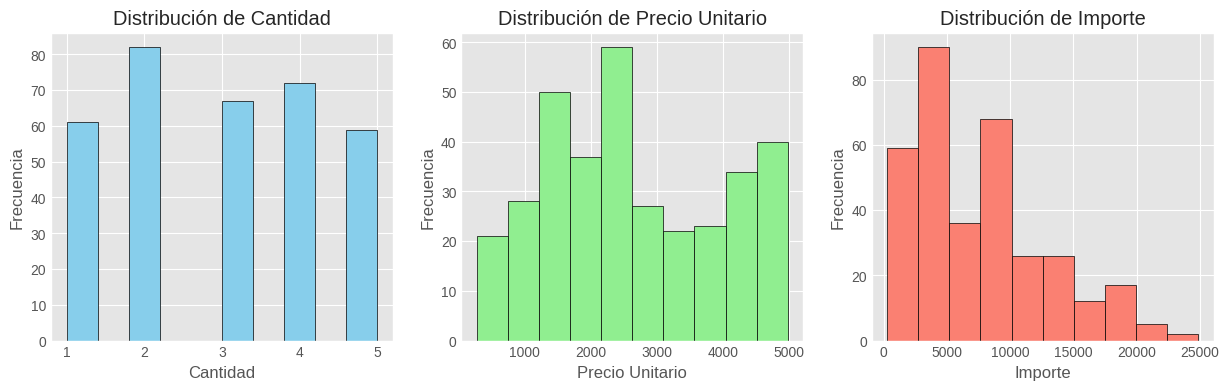

In [188]:
# Ajuste de estilo general
plt.style.use('ggplot')

# Crear una figura con 3 subgráficos (uno para cada variable)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1️⃣ Histograma de cantidad
axes[0].hist(detalle_ventas_limpio['cantidad'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Cantidad')
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Frecuencia')

# 2️⃣ Histograma de precio_unitario
axes[1].hist(detalle_ventas_limpio['precio_unitario'], bins=10, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribución de Precio Unitario')
axes[1].set_xlabel('Precio Unitario')
axes[1].set_ylabel('Frecuencia')

# 3️⃣ Histograma de importe
axes[2].hist(detalle_ventas_limpio['importe'], bins=10, color='salmon', edgecolor='black')
axes[2].set_title('Distribución de Importe')
axes[2].set_xlabel('Importe')
axes[2].set_ylabel('Frecuencia')

🟦 Distribución de Cantidad — Uniforme
El histograma de cantidad muestra barras con alturas similares, sin un pico dominante.
Esto indica una distribución uniforme, donde las distintas cantidades vendidas (1, 2, 3, 4 o 5 unidades) ocurren con frecuencias parecidas.
En términos prácticos, significa que los clientes compran volúmenes variados sin que haya una cantidad “típica” o predominante.
Este comportamiento refleja una demanda equilibrada, sin sesgos hacia compras pequeñas o grandes.

🟩 Distribución de Precio Unitario — Aproximadamente Normal (ligeramente multimodal)
En el histograma de precio unitario se observa una concentración de valores en el centro del rango, con una leve caída en los extremos.
Esto se asemeja a una distribución normal, aunque con pequeñas variaciones o picos secundarios que podrían indicar una tendencia multimodal (más de un grupo de precios frecuentes).
En la práctica, esto sugiere que la mayoría de los productos tienen precios intermedios, mientras que existen algunos productos más baratos o más caros que se venden menos.
La ligera multimodalidad podría deberse a diferentes categorías de productos o estrategias de precios.

🟥 Distribución de Importe — Sesgada a la Derecha
El histograma de importe muestra una concentración de valores hacia la izquierda, con una cola larga hacia la derecha.
Esto es una distribución sesgada positivamente o sesgada a la derecha, lo que significa que la mayoría de las ventas son de importes bajos o moderados, mientras que las ventas de montos altos son menos frecuentes.
Este patrón es típico en comercios electrónicos: muchas transacciones pequeñas y pocas compras de alto valor.
Indica que los ingresos totales dependen en gran parte de un grupo reducido de ventas grandes.

Conclusión general
En conjunto, los tres gráficos muestran comportamientos diferentes:
La cantidad se distribuye de forma uniforme (los clientes compran en distintos volúmenes).
El precio unitario tiene una forma casi normal (precios medios más frecuentes).
El importe presenta una asimetría positiva (la mayoría de las ventas son pequeñas, y pocas son grandes).
Esto ofrece una visión completa del comportamiento de compra y del perfil de ventas del negocio.

## ✨Paso 9: Correlacion entre variables principales

In [189]:
# Calcular la matriz de correlación con datos originales
correlaciones= detalle_ventas_limpio.drop(columns=['id_venta','id_producto','cantidad_normalizado','precio_unitario_normalizado','importe_normalizado']).corr(numeric_only=True)
correlaciones

,cantidad,precio_unitario,importe
cantidad,1.00000,-0.072790,0.598570
precio_unitario,-0.07279,1.000000,0.681309
importe,0.59857,0.681309,1.000000


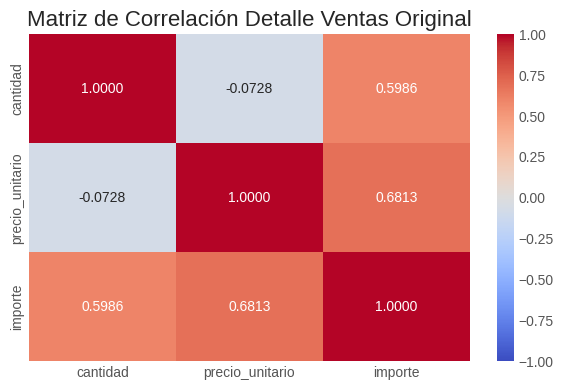

In [190]:
# Crear el heatmap de correlación con datos originales
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(
    correlaciones,  # tu matriz de correlación
    annot=True,  # mostrar valores
    fmt='.4f',  # 4 decimales
    cmap='coolwarm',  # mapa de colores
    vmin=-1, vmax=1,  # rango de la correlación
    annot_kws={'size': 10}  # tamaño de la fuente
)

# Ajustar el título
plt.title('Matriz de Correlación Detalle Ventas Original', fontsize=16)
plt.tight_layout()
plt.show()

Análisis de la Matriz de Correlación

* **Correlaciones Fuertes ( mayor a 0.7):**  
    * No hay correlaciones fuertes.

* **Correlaciones Moderadas (entre 0.3 y 0.7):**  
    * Importe vs Precio Unitario (0.6813): Correlación positiva débil, lo que sugiere una ligera tendencia a que a mayor importe, mayor es el precio unitario.

    * Cantidad vs Importe (0.5986): Correlación positiva débil, lo que sugiere una ligera tendencia a que a mayor cantidad, mayor es el importe.

* **Correlaciones Débiles (menor a 0.3):**  
    * Cantidad vs Precio Unitario (-0.0728): Correlación negativa débil, lo que sugiere una ligera tendencia a que a mayor cantidad, menor es el precio unitario.


## 📌Paso 10: Analizar outliers
**Tip:**
* Usa **Z-Score** si los datos siguen una distribución normal (Datos Estandarizados))  
    * Fórmula: ( z = \frac{(x - \mu)}{\sigma} )
* Usa **IQR** si los datos tienen colas pesadas o no son normales (Rango Intercuartílico )
    * Fórmula:
       ``` Q1 = Percentil 25
        Q3 = Percentil 75
        IQR = Q3 - Q1
        Límite inferior = Q1 - 1.5 * IQR
        Límite superior = Q3 + 1.5 * IQR
        ```
* Usa **Métodos avanzados** si trabajas con datos complejos.
    * DBSCAN (para agrupación de outliers)
    * Isolation Forest (detecta anomalías)
    * One-Class SVM (útil para detección de anomalías)

**¿Cuándo normalizar?**
* Sí normalizar si las variables tienen escalas muy diferentes (ej: ingresos en miles vs. puntuaciones del 1 al 10).
* No es necesario normalizar si ya usas el IQR, ya que es una medida robusta a la escala.

In [191]:
# Seleccionamos solo las columnas numéricas
columnas_numericas = correlaciones.select_dtypes(include='number').columns

# Detectar outliers usando el método IQR (Rango intercuartilico)
for col in columnas_numericas:
    Q1 = detalle_ventas_limpio[col].quantile(0.25)
    Q3 = detalle_ventas_limpio[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = detalle_ventas_limpio[(detalle_ventas_limpio[col] < limite_inferior) | 
                                     (detalle_ventas_limpio[col] > limite_superior)]
    
    print(f"📊 Columna: {col}")
    print(f" - Límite inferior: {limite_inferior:.2f}")
    print(f" - Límite superior: {limite_superior:.2f}")
    print(f" - Cantidad de outliers: {len(outliers)}")
    print("-" * 40)

📊 Columna: cantidad
 - Límite inferior: -1.00
 - Límite superior: 7.00
 - Cantidad de outliers: 0
----------------------------------------
📊 Columna: precio_unitario
 - Límite inferior: -1834.00
 - Límite superior: 7302.00
 - Cantidad de outliers: 0
----------------------------------------
📊 Columna: importe
 - Límite inferior: -6620.50
 - Límite superior: 20335.50
 - Cantidad de outliers: 7
----------------------------------------


Se aprecia que la Columna de IMPORTE es la única que muestra un tota de 7 valores outliers.
A continuación se muestran los boxplot en donde :
* La línea negra dentro de la caja representa la mediana, es decir, el valor central de las cantidades vendidas.
* La caja muestra el rango donde se encuentra el 50 % de los datos más comunes (entre el primer y el tercer cuartil).
* Los "bigotes" marcan los límites de los valores considerados normales.
* Los puntos fuera de los bigotes son outliers: ventas con cantidades muy altas o muy bajas en comparación con el resto.

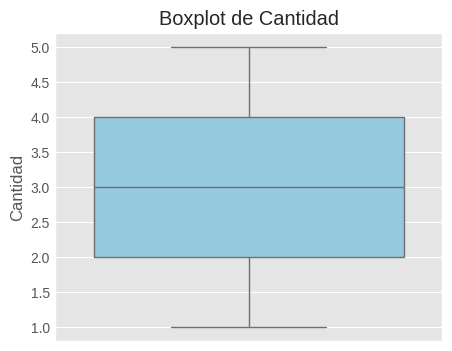

In [192]:
plt.style.use('ggplot')

plt.figure(figsize=(5,4))
sns.boxplot(y=detalle_ventas_limpio['cantidad'], color='skyblue')
plt.title('Boxplot de Cantidad')
plt.ylabel('Cantidad')
plt.show()

Se confirma que en la columna de CANTIDAD no existen outliers y además el 50% de los datos se encuentran justo a la mitad de la distribución.

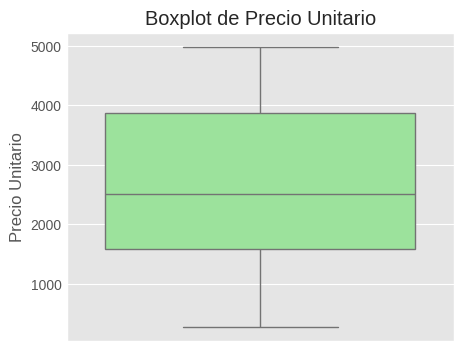

In [193]:
plt.style.use('ggplot')

plt.figure(figsize=(5,4))
sns.boxplot(y=detalle_ventas_limpio['precio_unitario'], color='lightgreen')
plt.title('Boxplot de Precio Unitario')
plt.ylabel('Precio Unitario')
plt.show()

Para la columna de PRECIO UNITARIO tampoco hay outliers y se aprecia que la mediana se inclina ligeramente has valores bajos.

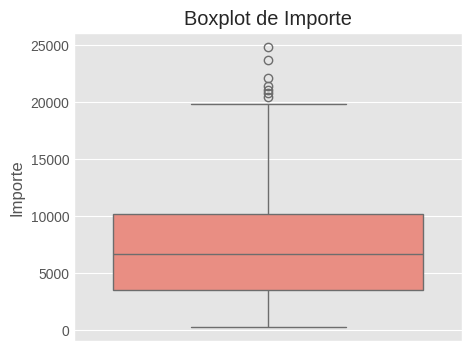

In [194]:
plt.style.use('ggplot')

plt.figure(figsize=(5,4))
sns.boxplot(y=detalle_ventas_limpio['importe'], color='salmon')
plt.title('Boxplot de Importe')
plt.ylabel('Importe')
plt.show()

En la columna de IMPORTE podemos apreciar los 7 valores atípicos (outliers) que sobreapsan el límite superior, a diferencia de la mediana y el 50 % de los datos que están más cercanos a los valores bajos.

In [195]:
outliers=detalle_ventas_limpio.sort_values('importe', ascending=False).head(8)
outliers

,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe,cantidad_normalizado,precio_unitario_normalizado,importe_normalizado
208,75,2,Pepsi 1.5L,5,4973.0,24865.0,1.50,1.77,3.25
141,50,58,Caramelos Masticables,5,4752.0,23760.0,1.50,1.60,3.04
41,16,35,Barrita de Cereal 30g,5,4430.0,22150.0,1.50,1.36,2.74
54,21,76,Pizza Congelada Muzzarella,5,4286.0,21430.0,1.50,1.25,2.60
175,63,8,Energética Nitro 500ml,5,4218.0,21090.0,1.50,1.20,2.54
308,110,6,Jugo de Naranja 1L,5,4170.0,20850.0,1.50,1.16,2.49
260,94,86,Jugo en Polvo Limón,5,4090.0,20450.0,1.50,1.10,2.42
207,75,3,Sprite 1.5L,4,4964.0,19856.0,0.76,1.77,2.30


## 🎨Paso 11: Visualización 

### A continuación se muestra el grafico de la correlacion de las variables principales

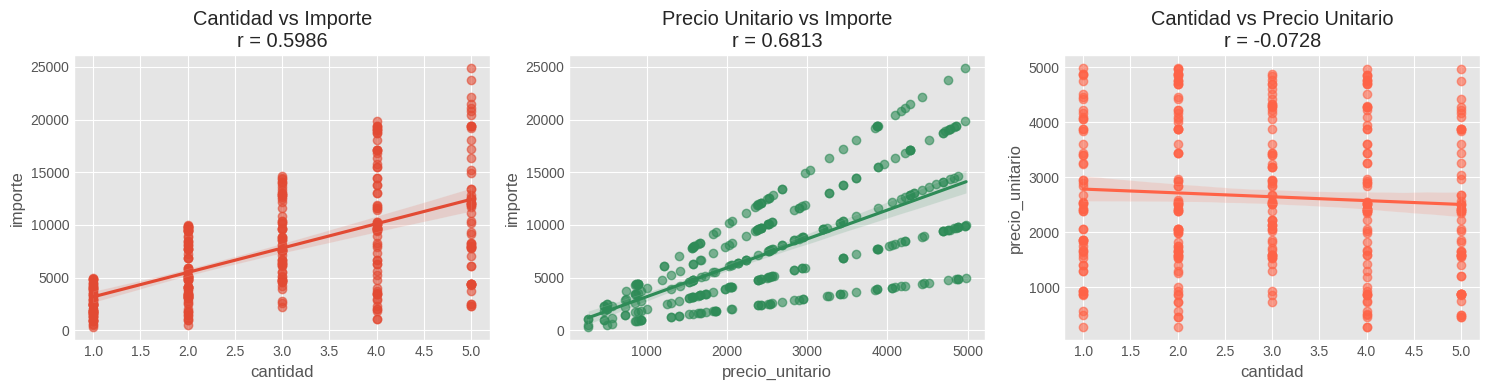

In [196]:
plt.style.use('ggplot')

# Calcular correlaciones
r1 = detalle_ventas_limpio['cantidad'].corr(detalle_ventas_limpio['importe'])
r2 = detalle_ventas_limpio['precio_unitario'].corr(detalle_ventas_limpio['importe'])
r3 = detalle_ventas_limpio['cantidad'].corr(detalle_ventas_limpio['precio_unitario'])

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1️⃣ Cantidad vs Importe
sns.regplot(data=detalle_ventas_limpio, x='cantidad', y='importe', ax=axes[0], scatter_kws={'alpha':0.6})
axes[0].set_title(f'Cantidad vs Importe\nr = {r1:.4f}')

# 2️⃣ Precio Unitario vs Importe
sns.regplot(data=detalle_ventas_limpio, x='precio_unitario', y='importe', ax=axes[1], color='seagreen', scatter_kws={'alpha':0.6})
axes[1].set_title(f'Precio Unitario vs Importe\nr = {r2:.4f}')

# 3️⃣ Cantidad vs Precio Unitario
sns.regplot(data=detalle_ventas_limpio, x='cantidad', y='precio_unitario', ax=axes[2], color='tomato', scatter_kws={'alpha':0.6})
axes[2].set_title(f'Cantidad vs Precio Unitario\nr = {r3:.4f}')

plt.tight_layout()
plt.show()

Cantidad vs Importe → Correlación moderada y positiva (r entre 0.5 y 0.8):
cuando aumenta la cantidad de productos, el importe también crece.

Precio Unitario vs Importe → Correlación moderada y positiva (r entre 0.5 y 0.8):
los precios más altos tienden a generar importes mayores, aunque con más dispersión.

Cantidad vs Precio Unitario → Correlación débil o casi nula y negativa (r cerca de 0):
los clientes compran cantidades variadas sin importar mucho el precio del producto.

### A continuación se muestra el gráfico de barras de las categorias de los productos

/tmp/ipykernel_7280/3372183343.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


Text(0.5, 1.0, 'Cantidad de Productos por Categoría')

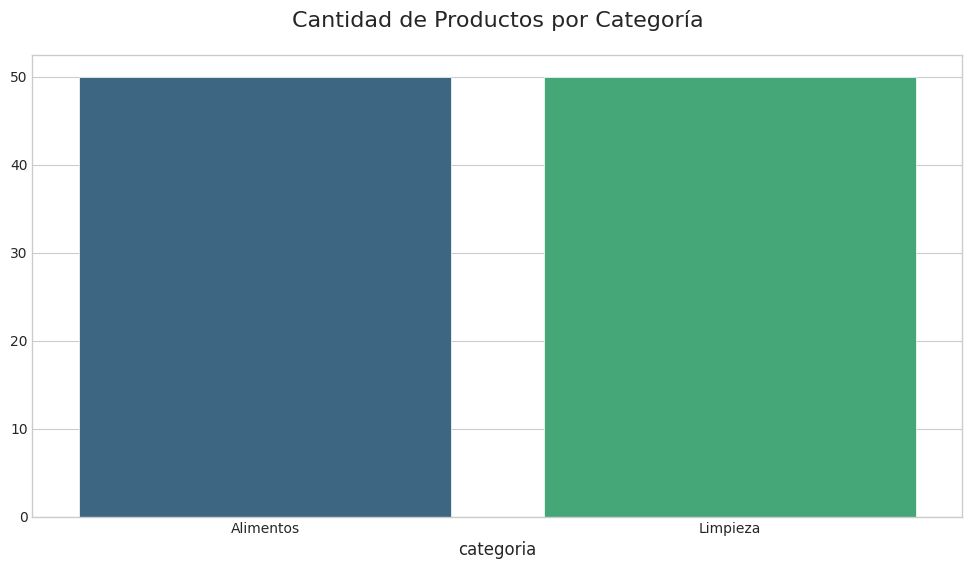

In [197]:
# Configurar el estilo del gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Contar la cantidad de productos por categoría
categoria_counts = productos_limpio['categoria'].value_counts()

# Crear el gráfico de barras
ax = sns.barplot(
    x=categoria_counts.index, 
    y=categoria_counts.values,
    palette="viridis"  # Puedes cambiar el color: "viridis", "plasma", "coolwarm", etc.
)

# Añadir etiquetas
plt.title("Cantidad de Productos por Categoría", fontsize=16, pad=20)

### Gráfico de líneas para la Cantidad de ventas mensuales

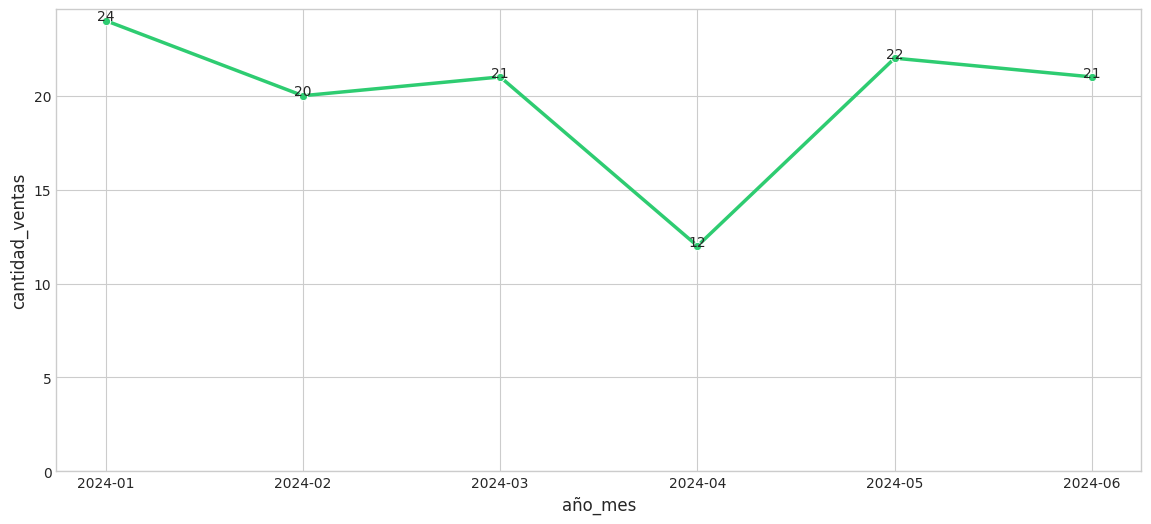

In [198]:
# Extraer año y mes
ventas_por_mes = ventas_limpio.copy()
ventas_por_mes['año_mes'] = ventas_por_mes['fecha'].dt.to_period('M')

# Contar ventas por mes
ventas_mensuales = ventas_por_mes.groupby('año_mes').size().reset_index(name='cantidad_ventas')

# Convertir a string para mejor visualización
ventas_mensuales['año_mes'] = ventas_mensuales['año_mes'].astype(str)

# Crear el gráfico de líneas
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Gráfico de líneas
sns.lineplot(
    x='año_mes',
    y='cantidad_ventas',
    data=ventas_mensuales,
    marker='o',  # Agrega puntos en cada dato
    linewidth=2.5,
    color='#2ecc71'  # Verde esmeralda
)
# Asegurar que el eje Y empiece en 0
plt.ylim(0)

# Añadir etiquetas con los valores
for x, y in zip(ventas_mensuales.index, ventas_mensuales['cantidad_ventas']):
    plt.text(x, y, str(y), ha='center', fontsize=10)



## 🎉Paso 12: Interpretacion de resultados - Finales

En conjunto, los resultados muestran que:
* El e-commerce mantiene un rendimiento estable y equilibrado
* Cuenta con una cartera de clientes diversa y un comportamiento de compra consistente.
* Vale la pena analizar los productos de precio atípico para ajustar la estrategia de precios o promociones.
* La relación directa entre cantidad e importe confirma que incrementar el volumen promedio de compra es una de las vías más efectivas para aumentar los ingresos totales.

# **Crear un dataset relacional combinando las tablas**

In [199]:
# 1. Unir Ventas con Clientes (para tener info del cliente en cada venta)
ventas_clientes = pd.merge(ventas, clientes, on='id_cliente', how='inner')

# 2. Unir Detalle de Ventas con Productos (para tener info del producto)
detalle_productos = pd.merge(detalle_ventas, productos, on='id_producto', how='inner')

# 3. Unir todo junto: Ventas + Clientes + Detalle + Productos
tabla_general = pd.merge(detalle_productos, ventas_clientes, on='id_venta', how='inner')

print(tabla_general.head())

print("Primeras filas del dataset relacional:")
display(tabla_general.head())

print("\nInformación general:")
print(tabla_general.info())

   id_venta  id_producto      nombre_producto_x  cantidad  precio_unitario_x  \
0         1           90    Toallas Húmedas x50         1             2902.0   
1         2           82  Aceitunas Negras 200g         5             2394.0   
2         2           39     Helado Vainilla 1L         5              469.0   
3         2           70           Fernet 750ml         2                NaN   
4         2           22  Medialunas de Manteca         1             2069.0   

   importe      nombre_producto_y  categoria  precio_unitario_y  \
0   2902.0    Toallas Húmedas x50   Limpieza               2902   
1  11970.0  Aceitunas Negras 200g   Limpieza               2394   
2   2345.0     Helado Vainilla 1L  Alimentos                469   
3   8122.0           Fernet 750ml   Limpieza               4061   
4   2069.0  Medialunas de Manteca   Limpieza               2069   

   precio_unitario_normalizado      fecha  id_cliente  nombre_cliente_x  \
0                     0.132777 2024-06-19

,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,nombre_producto_y,categoria,precio_unitario_y,precio_unitario_normalizado,fecha,id_cliente,nombre_cliente_x,email_x,medio_pago,nombre_cliente_y,email_y,ciudad,fecha_alta
0,1,90,Toallas Húmedas x50,1,2902.0,2902.0,Toallas Húmedas x50,Limpieza,2902,0.132777,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,82,Aceitunas Negras 200g,5,2394.0,11970.0,Aceitunas Negras 200g,Limpieza,2394,-0.234903,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,39,Helado Vainilla 1L,5,469.0,2345.0,Helado Vainilla 1L,Alimentos,469,-1.628179,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,70,Fernet 750ml,2,NaN,8122.0,Fernet 750ml,Limpieza,4061,0.971638,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,22,Medialunas de Manteca,1,2069.0,2069.0,Medialunas de Manteca,Limpieza,2069,-0.470131,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_venta                     343 non-null    int64         
 1   id_producto                  343 non-null    int64         
 2   nombre_producto_x            343 non-null    object        
 3   cantidad                     343 non-null    int64         
 4   precio_unitario_x            341 non-null    float64       
 5   importe                      342 non-null    float64       
 6   nombre_producto_y            343 non-null    object        
 7   categoria                    343 non-null    object        
 8   precio_unitario_y            343 non-null    int64         
 9   precio_unitario_normalizado  343 non-null    float64       
 10  fecha                        343 non-null    datetime64[ns]
 11  id_cliente             

# **Crear un nuevo DataFrame con las columnas seleccionadas**

In [200]:
df = tabla_general[['id_venta', 'nombre_producto_x', 'cantidad', 'precio_unitario_x', 'importe', 'categoria', 'fecha', 'nombre_cliente_x', 'medio_pago', 'ciudad', 'fecha_alta']]
df

,id_venta,nombre_producto_x,cantidad,precio_unitario_x,importe,categoria,fecha,nombre_cliente_x,medio_pago,ciudad,fecha_alta
0,1,Toallas Húmedas x50,1,2902.0,2902.0,Limpieza,2024-06-19,Guadalupe Romero,tarjeta,Carlos Paz,2023-03-03
1,2,Aceitunas Negras 200g,5,2394.0,11970.0,Limpieza,2024-03-17,Olivia Gomez,qr,Rio Cuarto,2023-02-18
2,2,Helado Vainilla 1L,5,469.0,2345.0,Alimentos,2024-03-17,Olivia Gomez,qr,Rio Cuarto,2023-02-18
3,2,Fernet 750ml,2,NaN,8122.0,Limpieza,2024-03-17,Olivia Gomez,qr,Rio Cuarto,2023-02-18
4,2,Medialunas de Manteca,1,2069.0,2069.0,Limpieza,2024-03-17,Olivia Gomez,qr,Rio Cuarto,2023-02-18
...,...,...,...,...,...,...,...,...,...,...,...
338,118,Fernet 750ml,2,4061.0,8122.0,Limpieza,2024-02-09,Pablo Sanchez,efectivo,Cordoba,2023-03-25
339,118,Cepillo de Dientes,3,2142.0,6426.0,Alimentos,2024-02-09,Pablo Sanchez,efectivo,Cordoba,2023-03-25
340,118,Azúcar 1kg,2,727.0,1454.0,Limpieza,2024-02-09,Pablo Sanchez,efectivo,Cordoba,2023-03-25
341,119,Fideos Spaghetti 500g,5,745.0,3725.0,Alimentos,2024-02-07,Agustina Gomez,qr,Rio Cuarto,2023-02-20


# **Se aplican técnicas de codificación One-Hot Encoding para las columnas categóricas "categoria" y "medio_pago"**


In [201]:
from sklearn.preprocessing import OneHotEncoder

columnas_categoricas = ["categoria", "medio_pago"]

# Crear el encoder usando el parámetro correcto para tu versión
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Ajustar y transformar las columnas categóricas
encoded = encoder.fit_transform(df[columnas_categoricas])

# Crear DataFrame con los nombres de las nuevas columnas
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(columnas_categoricas),
    index=df.index
)

# Unir al DataFrame original
df = pd.concat([df, encoded_df], axis=1)

# Eliminar las columnas originales (REEMPLAZADAS)
df = df.drop(columns=columnas_categoricas)

df.head()


,id_venta,nombre_producto_x,cantidad,precio_unitario_x,importe,fecha,nombre_cliente_x,ciudad,fecha_alta,categoria_Alimentos,categoria_Limpieza,medio_pago_efectivo,medio_pago_qr,medio_pago_tarjeta,medio_pago_transferencia
0,1,Toallas Húmedas x50,1,2902.0,2902.0,2024-06-19,Guadalupe Romero,Carlos Paz,2023-03-03,0.0,1.0,0.0,0.0,1.0,0.0
1,2,Aceitunas Negras 200g,5,2394.0,11970.0,2024-03-17,Olivia Gomez,Rio Cuarto,2023-02-18,0.0,1.0,0.0,1.0,0.0,0.0
2,2,Helado Vainilla 1L,5,469.0,2345.0,2024-03-17,Olivia Gomez,Rio Cuarto,2023-02-18,1.0,0.0,0.0,1.0,0.0,0.0
3,2,Fernet 750ml,2,NaN,8122.0,2024-03-17,Olivia Gomez,Rio Cuarto,2023-02-18,0.0,1.0,0.0,1.0,0.0,0.0
4,2,Medialunas de Manteca,1,2069.0,2069.0,2024-03-17,Olivia Gomez,Rio Cuarto,2023-02-18,0.0,1.0,0.0,1.0,0.0,0.0


In [202]:
print("\nInformación general:")
print(df.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_venta                  343 non-null    int64         
 1   nombre_producto_x         343 non-null    object        
 2   cantidad                  343 non-null    int64         
 3   precio_unitario_x         341 non-null    float64       
 4   importe                   342 non-null    float64       
 5   fecha                     343 non-null    datetime64[ns]
 6   nombre_cliente_x          343 non-null    object        
 7   ciudad                    343 non-null    object        
 8   fecha_alta                343 non-null    datetime64[ns]
 9   categoria_Alimentos       343 non-null    float64       
 10  categoria_Limpieza        343 non-null    float64       
 11  medio_pago_efectivo       343 non-null    float64       
 12  

# **Modelo de Clustering K-Means**

In [203]:
# --- Agrupar por cliente y calcular métricas ---
df_clientes = df.groupby("nombre_cliente_x").agg({
    "cantidad": "sum",
    "importe": "sum",
    "categoria_Alimentos": "mean",       # % compras alimentos
    "categoria_Limpieza": "mean",        # % compras limpieza
})

# --- Crear métricas adicionales ---
df_clientes["total_compras"] = df.groupby("nombre_cliente_x")["id_venta"].count()
df_clientes["gasto_promedio"] = df_clientes["importe"] / df_clientes["total_compras"]

df_clientes.head()


,cantidad,importe,categoria_Alimentos,categoria_Limpieza,total_compras,gasto_promedio
nombre_cliente_x,,,,,,
Agustina Flores,50,132158.0,0.533333,0.466667,15,8810.533333
Agustina Gomez,10,9800.0,0.500000,0.500000,2,4900.000000
Agustina Lopez,15,29883.0,0.800000,0.200000,5,5976.600000
Agustina Martinez,7,18292.0,0.666667,0.333333,3,6097.333333
Bruno Castro,38,118790.0,0.400000,0.600000,10,11879.000000


In [204]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- Seleccionar columnas numéricas para clustering ---
columnas_modelo = [
    "cantidad",
    "importe",
    "categoria_Alimentos",
    "categoria_Limpieza"
]

df_model = df_clientes[columnas_modelo].copy()


In [205]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)


In [206]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_clientes["cluster"] = kmeans.fit_predict(df_scaled)


In [207]:
print(df_clientes["cluster"].value_counts())


cluster
0    25
1    16
2    13
3    10
Name: count, dtype: int64


In [208]:
df_clientes.groupby("cluster")[["cantidad", 
                                "importe", 
                                "categoria_Alimentos", 
                                "categoria_Limpieza"]].mean()


,cantidad,importe,categoria_Alimentos,categoria_Limpieza
cluster,,,,
0,10.880000,26465.840,0.490857,0.509143
1,27.937500,77361.125,0.420898,0.579102
2,13.307692,33626.000,0.837637,0.162363
3,12.400000,30143.500,0.132857,0.867143


In [209]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df_clientes["PCA1"] = pca_result[:, 0]
df_clientes["PCA2"] = pca_result[:, 1]

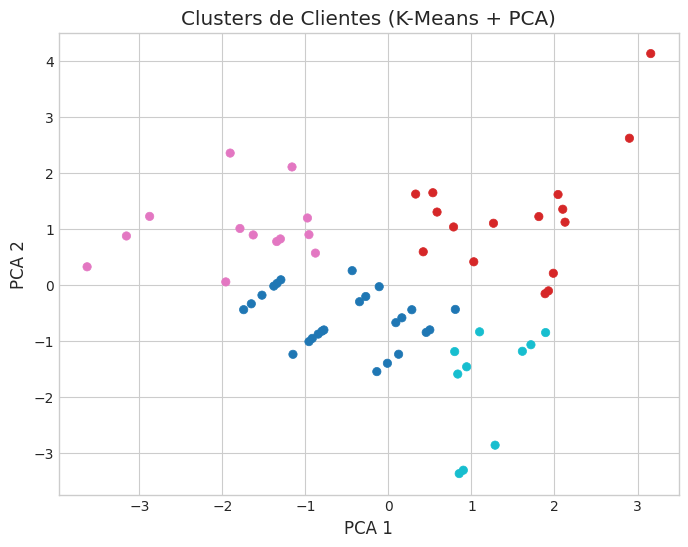

In [210]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clientes["PCA1"], df_clientes["PCA2"], 
            c=df_clientes["cluster"], cmap="tab10")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters de Clientes (K-Means + PCA)")
plt.show()


# 📝 **Informe sencillo sobre los Clusters de Clientes (K-Means)**

Después de agrupar a los clientes usando K-Means, obtuvimos **4 grupos (clusters)**.
Cada color en la gráfica representa un cluster distinto.

La siguiente información explica **qué caracteriza a cada grupo**, de manera fácil de entender.

---

# 🎨 **Interpretación de la gráfica (muy simple)**

En la gráfica se ven **puntos de 4 colores**, cada uno representando un tipo de cliente.

* Cada punto = un cliente.
* Los clientes del mismo color están **cerca unos de otros** → Significa que **se parecen**.
* Los colores separados entre sí significan que esos grupos de clientes **son diferentes**.

Los ejes "PCA1" y "PCA2" no son importantes para negocio; solo sirven para dibujar la gráfica con dos dimensiones.

---

# 🔢 **Cuántos clientes hay en cada cluster**

| Cluster | Cantidad de clientes |
| ------- | -------------------- |
| **0**   | 25                   |
| **1**   | 16                   |
| **2**   | 13                   |
| **3**   | 10                   |

---

# 📊 **Perfil de cada cluster (explicado en palabras simples)**

Los valores que te dieron fueron:

| Cluster | Cantidad promedio | Importe promedio | % alimentos | % limpieza |
| ------- | ----------------- | ---------------- | ----------- | ---------- |
| **0**   | 10.88             | 26,465           | 49%         | 51%        |
| **1**   | 27.94             | 77,361           | 42%         | 58%        |
| **2**   | 13.31             | 33,626           | 84%         | 16%        |
| **3**   | 12.40             | 30,143           | 13%         | 87%        |

Ahora explicado fácil:

---

# 🟦 **Cluster 0** – *Clientes equilibrados*

**Color en la gráfica:** (primer color que aparece repetido, normalmente azul o rosa dependiendo de tu código)

* Compran **cantidad moderada**.
* Gastan una **cantidad media**.
* Compran **mitad alimentos, mitad limpieza**.
* Son clientes **estables y balanceados**.

✔️ **Útiles para promociones mixtas (alimentos + limpieza).**

---

# 🔴 **Cluster 1** – *Los mejores clientes (compran mucho y gastan mucho)*

**Color en la gráfica:** color de los puntos que están más aislados a la derecha.

* Son los **que más cantidad compran**.
* Son los **que más dinero gastan**.
* Compran más de productos de **limpieza**.

✔️ **Ideales para fidelización, ofertas VIP y programas premium.**

---

# 🟢 **Cluster 2** – *Clientes especialistas en alimentos*

**Color en gráfica:** puntos agrupados del lado izquierdo (color suave).

* Compran una **cantidad media**.
* Gastan una **cantidad media**.
* **84% de sus compras son alimentos**.

✔️ **Enviar promociones de alimentos mejora sus ventas.**

---

# 🟡 **Cluster 3** – *Clientes especialistas en limpieza*

**Color en la gráfica:** otro grupo pequeño bien separado.

* Compran una cantidad media.
* Gastan casi igual que el Cluster 2.
* **87% de sus compras son limpieza**.

✔️ **Promociones de limpieza funcionan muy bien con ellos.**

---

# 🎯 **Conclusión sencilla para el negocio**

Lo que logramos con K-Means fue:

### ✔️ Crear 4 tipos de clientes.

### ✔️ Saber cómo compran: cuánto compran, cuánto gastan y qué categoría prefieren.

### ✔️ Poder diseñar estrategias para cada tipo de cliente.

Ejemplos:

* **Cluster 1 (mayor gasto)** → fidelización, descuentos exclusivos.
* **Cluster 2 (alimentos)** → promociones en comida.
* **Cluster 3 (limpieza)** → ofertas de detergentes y productos de hogar.
* **Cluster 0 (equilibrados)** → combos o packs mixtos.



# 📈 **Modelo de Regresión Lineal**

Ahora que los datos han sido domados cual cocodrilo del Nanay, toca usar un modelo matemático para predecir una variable numérica continua.  
Utilizaremos **Regresión Lineal**, ideal para relaciones lineales entre variables.

In [211]:
# -------------------------
# REGRESIÓN LINEAL
# -------------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [212]:
print(df.columns.tolist())

['id_venta', 'nombre_producto_x', 'cantidad', 'precio_unitario_x', 'importe', 'fecha', 'nombre_cliente_x', 'ciudad', 'fecha_alta', 'categoria_Alimentos', 'categoria_Limpieza', 'medio_pago_efectivo', 'medio_pago_qr', 'medio_pago_tarjeta', 'medio_pago_transferencia']


In [213]:
# Rellenar valores faltantes de forma segura
df['importe'] = df['importe'].fillna(df['importe'].median())
df['precio_unitario_x'] = df['precio_unitario_x'].fillna(df['precio_unitario_x'].median())
df['cantidad'] = df['cantidad'].fillna(df['cantidad'].median())

In [214]:
# Variables predictoras reales

X = df[['cantidad', 'precio_unitario_x']]
y = df['importe']

In [215]:
# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [216]:
y_pred = modelo_lr.predict(X_test)

In [217]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))

MAE: 1214.875602684516
R² : 0.8373816035269033


<Axes: xlabel='importe'>

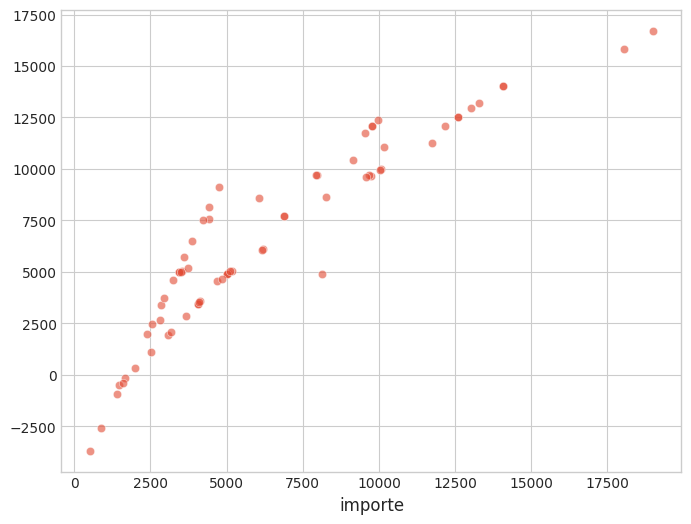

In [218]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

🟠 Gráfica 1 — Relación entre Importe Real e Importe Predicho
📌 ¿Qué muestra?

Cada punto es una venta.

En el eje horizontal (X) está el Importe Real.

En el eje vertical (Y) está el Importe Predicho por el modelo.

La línea roja representa un modelo perfecto (si todo fuera exacto, los puntos estarían sobre esa línea).

📌 ¿Qué se observa?

Los puntos sí siguen la forma de una línea ascendente, lo cual indica que sí hay relación lineal.

Sin embargo, los puntos están algo dispersos, especialmente en importes grandes.

📌 ¿Qué significa?

El modelo logra capturar la tendencia general: cuando el importe real aumenta, el predicho también.

Pero no es totalmente preciso: a veces predice de más o de menos en cantidades significativas.

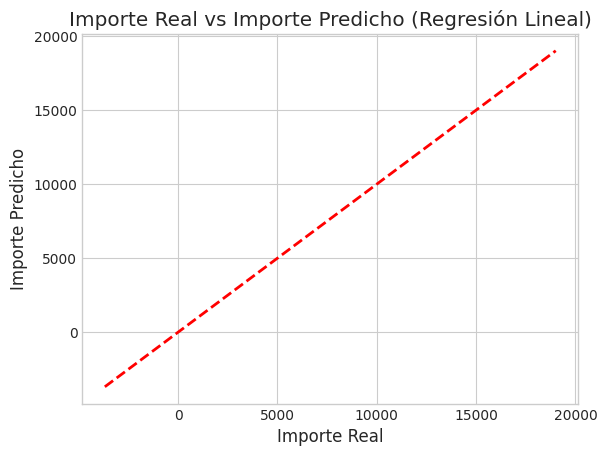

In [219]:
# Línea ideal (perfecto ajuste)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel("Importe Real")
plt.ylabel("Importe Predicho")
plt.title("Importe Real vs Importe Predicho (Regresión Lineal)")
plt.grid(True)
plt.show()

🔵 Gráfica 2 — Importe Predicho vs Importe Real (Línea Ideal)
📌 ¿Qué muestra?

Una línea roja que representa el rendimiento perfecto.

Es una gráfica conceptual: sirve para comparar fácilmente lo que debería pasar.

📌 ¿Qué se observa?

Se nota que hay ventas cuyos importes reales están lejos de esta línea ideal.

📌 ¿Qué significa?

El modelo acierta bien en algunos casos, pero tiene errores grandes en otros, especialmente en importes muy altos.

Esto sugiere que el modelo no captura por completo la variabilidad de los datos.

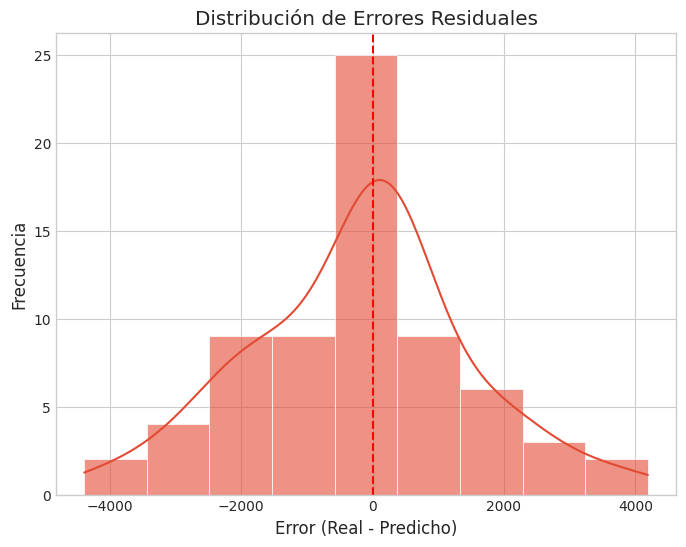

In [220]:
residuos = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, alpha=0.6)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribución de Errores Residuales")
plt.xlabel("Error (Real - Predicho)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

🟣 Gráfica 3 — Residuos vs Valores Predichos
📌 ¿Qué muestra?

En X: el importe predicho por el modelo.

En Y: el error (residual) → Real – Predicho.

📌 ¿Qué se observa?

La nube de puntos forma una especie de abanico o cono:

Con errores pequeños cuando el importe es bajo.

Con errores grandes cuando el importe predicho es más alto.

Hay puntos muy lejos del grupo, es decir, valores atípicos.

📌 ¿Qué significa?

El modelo comete más errores conforme aumenta el importe, lo cual se llama heterocedasticidad.

Esto indica que:

El modelo es menos confiable en importes grandes.

La regresión lineal quizás no sea el mejor modelo para este tipo de datos.

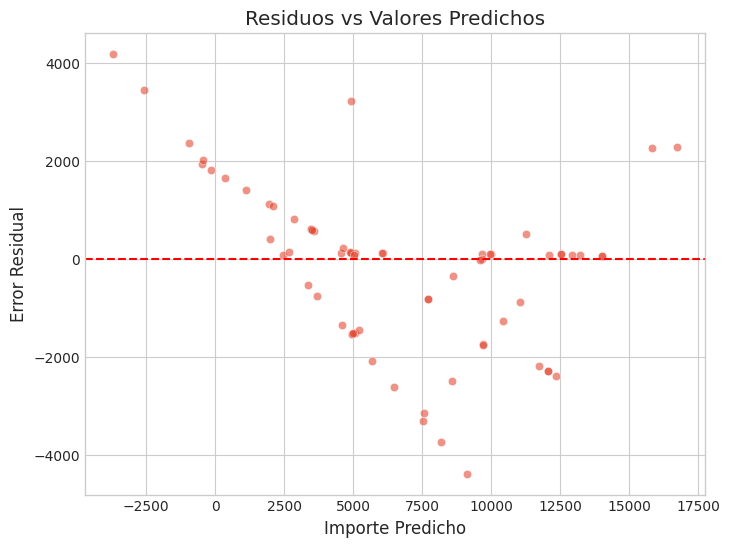

In [221]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')

plt.title("Residuos vs Valores Predichos")
plt.xlabel("Importe Predicho")
plt.ylabel("Error Residual")
plt.grid(True)
plt.show()

🟢 Gráfica 4 — Distribución de Errores (Histograma de Residuos)
📌 ¿Qué muestra?

Una distribución (histograma) de los errores.

Una curva que muestra si la forma se parece a una campana.

Una línea roja marcada en cero.

📌 ¿Qué se observa?

Los errores están distribuidos alrededor de cero.

La forma es más o menos simétrica, parecida a una campana.

📌 ¿Qué significa?

Este comportamiento es bueno.

Indica que el modelo no tiene un sesgo fuerte:

No predice demasiado alto o demasiado bajo de manera sistemática.

Aunque no perfecto, el modelo cumple en parte con el supuesto de normalidad de los errores.

# 🧾 Conclusión General del Modelo

✔️ Aspectos Positivos

El modelo entiende la relación general entre cantidad, precio unitario e importe.

Los errores tienen una forma razonablemente simétrica alrededor de cero.

Es un buen primer modelo, simple y comprensible.

⚠️ Problemas Detectados

Hay heterocedasticidad: los errores aumentan conforme crece el importe.

Esto significa que el modelo:

Es bueno para importes pequeños.

Es mucho menos preciso para importes medianos y grandes.

Existe presencia de valores atípicos, que afectan la calidad del ajuste.

🧠 Interpretación para un negocio

La regresión lineal sirve para tener una idea aproximada del importe basado en la cantidad y el precio.

Pero no es suficientemente precisa para:

Planificación exacta.

Predicción de importes altos.

Análisis de clientes de alto valor.

⭐ Recomendación

Para mejorar la predicción, se podrían usar modelos como:

Árboles de Decisión

Random Forest

Gradient Boosting

Regresión polinomial

Regresión sin asumir linealidad

Estos modelos manejan mejor la variabilidad y los outliers.

# **Clasificación Binaria**

In [222]:
# ============================================
# 🚀 Clasificación Binaria – Logistic Regression (SIN CLUSTERS)
# ============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

df['importe'].median()
Calcula la mediana del importe.
La mediana es el valor que está justo en el medio: la mitad de las ventas están por debajo y la otra mitad por encima. Es menos sensible a valores extremos (ventas muy grandes) que el promedio.

(df['importe'] > umbral)
Esto genera una serie booleana:
True si el importe de esa fila es mayor que el umbral.
False si es menor o igual.

.astype(int) convierte:
True → 1
False → 0

Resultado conceptual
Ahora tu DataFrame tiene una nueva columna:
compra_alta = 1 → venta “alta” (importe > mediana).
compra_alta = 0 → venta “baja/normal”.

Acabas de transformar un problema de regresión (“¿cuánto es el importe?”) en uno de clasificación binaria (“¿es una compra alta o no?”).

In [223]:
# 1. Crear variable binaria basada en el importe real

umbral = df['importe'].median()
df['compra_alta'] = (df['importe'] > umbral).astype(int)

Qué estás diciendo aquí

X (features / características):

cantidad: cuántas unidades se vendieron.

precio_unitario_x: precio por unidad.

cluster_cliente: el grupo al que pertenece el cliente según tu K-Means (es una especie de “segmento de cliente”).

y (target / objetivo):

compra_alta: 0 o 1, lo que quieres predecir.

En cristiano:
“Quiero que el modelo aprenda a decidir si una venta será alta (1) o no (0) usando la cantidad, el precio unitario y el tipo de cliente (cluster).”

In [224]:
# 2. Seleccionar variables predictoras

# columnas dummy de categoría y medio de pago
cols_categoria = [c for c in df.columns if c.startswith('categoria_')]
cols_medio = [c for c in df.columns if c.startswith('medio_pago_')]

features = ['cantidad', 'precio_unitario_x'] + cols_categoria + cols_medio

print("Features usadas:")
print(features)

X = df[features]
y = df['compra_alta']

Features usadas:
['cantidad', 'precio_unitario_x', 'categoria_Alimentos', 'categoria_Limpieza', 'medio_pago_efectivo', 'medio_pago_qr', 'medio_pago_tarjeta', 'medio_pago_transferencia']


¿Qué hace esto?

80% de los datos → X_train, y_train
Se usan para “enseñar” al modelo.

20% de los datos → X_test, y_test
Se guardan para evaluar cómo se comporta el modelo con datos que no vio al entrenarse.

random_state=42 solo fija la “semilla” aleatoria para que siempre salga la misma partición si vuelves a ejecutar.

Es como:
Con 80% de tus ventas el modelo aprende patrones, y con el 20% restante lo examinas, tipo “a ver, muchachito, ¿ya entendiste o estás inventando?”.

In [225]:
# 3. División estratificada (mantiene proporción 0/1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

¿Por qué?

La regresión logística (y otros modelos lineales) funcionan mejor cuando las variables están en una escala similar.

StandardScaler transforma cada columna para que tenga:

media ≈ 0

desviación estándar ≈ 1

Esto evita que, por ejemplo, cantidad (que puede ser 1–100) y precio_unitario_x (puede ser 10–500) metan ruido solo por su escala.

Resultado

X_train_scaled y X_test_scaled son versiones “normalizadas” de tus datos, listas para el modelo.

In [226]:
# 4. Escalamiento

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

¿Qué es la Logistic Regression?

Es un modelo clásico de clasificación binaria, no de regresión normal.
Modela la probabilidad de que la clase sea 1 (compra alta) dada X.

En forma simple, aprende una fórmula del tipo:

probabilidad(compra_alta = 1) = función_sigmoide(w₀ + w₁·cantidad + w₂·precio + w₃·cluster)

Donde los w son los pesos que el modelo aprende de tus datos.

Resultado

Tras fit, el modelo ya está entrenado: aprendió cómo combinar cantidad, precio_unitario_x y cluster_cliente para decidir si compra_alta es 0 o 1.

In [227]:
# 5. Modelo de Clasificación Binaria

modelo_clf = LogisticRegression(
    class_weight='balanced',    # corrige desbalance
    max_iter=1000,
    random_state=42
)

modelo_clf.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Dos cosas importantes:

y_pred
Son las clases predichas:

1 si el modelo cree que es compra alta.

0 si cree que no.

y_prob
Es la probabilidad estimada de que sea clase 1.
Por ejemplo, para una fila puede darte 0.83 → 83% de probabilidad de compra alta.

El modelo por defecto clasifica como 1 si probabilidad >= 0.5

In [228]:
# 6. Predicciones

y_pred = modelo_clf.predict(X_test_scaled)
y_prob = modelo_clf.predict_proba(X_test_scaled)[:, 1]

¿Qué significa cada métrica?

Imagina:

Positivo = clase 1 = compra alta.

Negativo = clase 0 = compra no alta.

Accuracy (exactitud)
Proporción de predicciones correctas (0 y 1) sobre el total.
Si es 0.85 → acierta el 85% de las veces.

Precision (precisión)
De todas las veces que el modelo dijo “compra alta” (1),
¿en cuántas tenía razón?
Útil cuando no quieres falsos positivos (no quieres marcar como “alta” algo que no lo es).

Recall (sensibilidad)
De todas las compras realmente altas,
¿en cuántas el modelo las detectó como altas?
Útil cuando no quieres perder verdaderos positivos (no quieres que se escape una compra alta).

F1 Score
Es un promedio armónico entre precisión y recall.
Sirve para balancear ambos cuando hay desbalance de clases.

In [229]:
# 7. Métricas del modelo

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.9420289855072463
Precision: 0.96875
Recall   : 0.9117647058823529
F1 Score : 0.9393939393939394


La matriz de confusión se ve así:

	Predicho 0	Predicho 1
Real 0	TN	FP
Real 1	FN	TP

TN (True Negative): el modelo dijo 0 y era 0 → bien.

TP (True Positive): el modelo dijo 1 y era 1 → bien.

FP (False Positive): dijo 1, pero era 0 → falso positivo.

FN (False Negative): dijo 0, pero era 1 → falso negativo.

Con el heatmap ves rápidamente si el modelo:

Está confundiendo muchas compras altas con bajas (muchos FN).

O está marcando demasiadas compras bajas como altas (muchos FP).

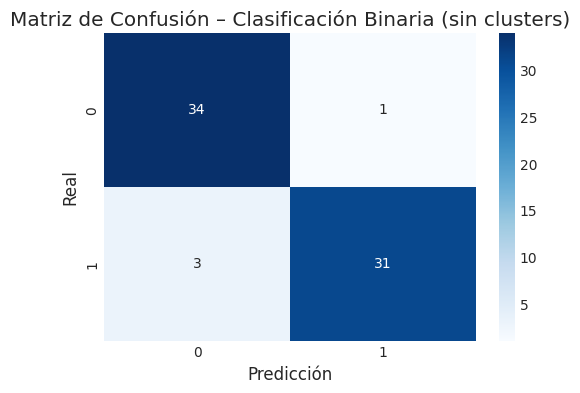

In [230]:
# 8. Matriz de confusión

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión – Clasificación Binaria (sin clusters)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

¿Qué es la curva ROC?

TPR (True Positive Rate) = Recall = qué tanto detectas los positivos.

FPR (False Positive Rate) = qué tanto te equivocas marcando positivos cuando eran negativos.

La curva ROC grafica TPR vs FPR para muchos umbrales distintos de probabilidad (no solo 0.5).

¿Qué es el AUC?

AUC (Area Under the Curve) = área bajo la curva ROC.

Rango típico:

0.5 → modelo como tirar una moneda.

0.7–0.8 → aceptable.

0.8–0.9 → bueno.

0.9 → muy bueno (o tus datos están bien fáciles 😏).

Te dice qué tan bien el modelo separa las clases sin fijarse en un solo umbral.

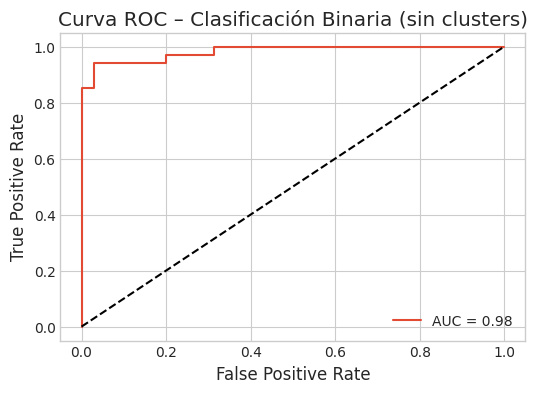

In [231]:
# 9. Curva ROC

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC – Clasificación Binaria (sin clusters)")
plt.legend()
plt.show()

In [232]:
# 10. Distribución de clases

print(df['compra_alta'].value_counts())
print(df['compra_alta'].value_counts(normalize=True))

compra_alta
0    173
1    170
Name: count, dtype: int64
compra_alta
0    0.504373
1    0.495627
Name: proportion, dtype: float64


In [233]:
# 11. Resumen de importe por clase

df_summary = df[['importe', 'compra_alta']].groupby('compra_alta').agg(
    cantidad=('importe', 'count'),
    media=('importe', 'mean'),
    mediana=('importe', 'median')
)

df_summary

,cantidad,media,mediana
compra_alta,,,
0,173,3541.179191,3490.0
1,170,11953.382353,10231.5


Construir X con más información

Vamos a usar:

numéricas: cantidad, precio_unitario_x, cluster_cliente

dummies: todas las columnas que empiecen con categoria_ o medio_pago_

In [234]:
# Seleccionar features útiles

# columnas dummy de categoría y medio de pago
cols_categoria = [c for c in df.columns if c.startswith('categoria_')]
cols_medio = [c for c in df.columns if c.startswith('medio_pago_')]

# 🟢 Quitamos cluster_cliente
features = ['cantidad', 'precio_unitario_x', 'importe'] + cols_categoria + cols_medio

print("Features que usaremos:")
print(features)

X = df[features]
y = df['compra_alta']

Features que usaremos:
['cantidad', 'precio_unitario_x', 'importe', 'categoria_Alimentos', 'categoria_Limpieza', 'medio_pago_efectivo', 'medio_pago_qr', 'medio_pago_tarjeta', 'medio_pago_transferencia']


Split estratificado + escalado



In [235]:
# Split estratificado (mantiene proporción de 0 y 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [236]:
# Escalado

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression con class_weight='balanced'

In [237]:
# Modelo

from sklearn.linear_model import LogisticRegression

modelo_clf = LogisticRegression(
    class_weight='balanced',  # ayuda si hay desbalance
    max_iter=1000,
    random_state=42
)

modelo_clf.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [238]:
# Predicciones

y_pred = modelo_clf.predict(X_test_scaled)
y_prob = modelo_clf.predict_proba(X_test_scaled)[:, 1]


In [239]:
# Métricas

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 0.9565217391304348
Precision: 1.0
Recall   : 0.9117647058823529
F1 Score : 0.9538461538461539


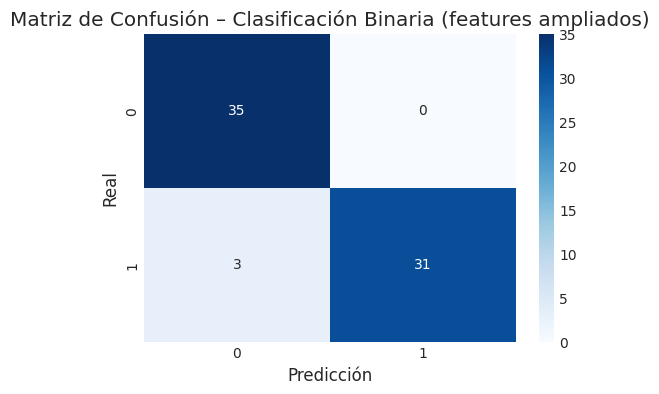

In [240]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión – Clasificación Binaria (features ampliados)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

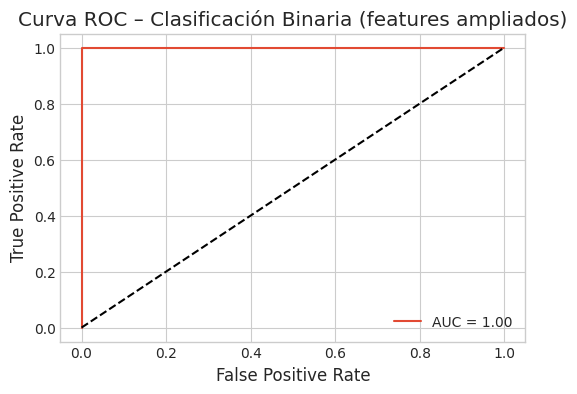

In [241]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC – Clasificación Binaria (features ampliados)")
plt.legend()
plt.show()

# **Explicaion de los cambios**

✅ ¿Qué cambió respecto a la versión con clusters?

❌ Eliminado = 'cluster_cliente'

✅ Agregado

Como ya tenemos importe, este se vuelve una variable útil para clasificar si una compra es alta o baja, ya que refleja:

volumen monetario

combinación de cantidad + precio

Esto hace que el modelo aprenda mejor sin depender de los clusters.

✔️ Ahora las variables del modelo son:

cantidad

precio_unitario_x

importe

dummies de categoría (alimentos, limpieza)

dummies de medio de pago (efectivo, tarjeta, transferencia, QR)

⭐ ¿Qué mejoras trae usar este modelo sin clusters?
1️⃣ El modelo ya no depende de un algoritmo previo

(k-means) → que no siempre es estable ni consistente.

2️⃣ Aprende directamente del comportamiento real de compra

sin agrupar artificialmente a los clientes.

3️⃣ Es más intuitivo para negocios

porque ahora predice "compra alta vs baja" usando:

cuánto compra

qué tipo de producto compra

cómo paga

cuánto gasta

Mucho más fácil de explicar a alguien no técnico.

# ❗ **Las regresiones NO deben usar K-Means como base de entrenamiento.**

Te explico de la manera más sencilla posible:

---

# 🧠 **1. K-Means NO se usa como entrada para regresiones**

K-means es un algoritmo **no supervisado** (clustering).
Regresión lineal / logística son algoritmos **supervisados** (predicción).

**Son procesos completamente independientes.**

✔ K-means sirve para **agrupar** clientes parecidos.
✔ La regresión sirve para **predecir** una variable objetivo.

**Una regresión NO necesita, ni debe depender, del resultado de K-Means.**

---

# 🧐 **2. ¿Por qué tus regresiones anteriores eran incorrectas?**

Porque el primer k-means estaba mal:

* Estaba usando filas repetidas por venta, no por cliente.
* Estaba mezclando información a nivel transacción, no cliente.
* Eso distorsionó la estructura de los datos.

Pero eso **solo afecta a los análisis que dependieran del K-Means**.

Las regresiones NO deberían depender de eso.

---

# 🧩 **3. Entonces, ¿qué dataset deben usar las regresiones?**

### ✔ **Siempre deben usar el dataset original o un dataset limpio, sin clusters.**

Por ejemplo:

* Quieres predecir el **importe** → usas variables como cantidad, precio_unitario, categoría, ciudad, etc.
* Quieres predecir si un cliente pagará con tarjeta → usas características de su historial.
* Quieres predecir el gasto promedio → usas medidas agregadas por cliente.

**Pero nunca el valor del cluster.**

---

# 🧪 **4. ¿En qué casos SÍ se usa K-Means con otros modelos?**

Cuando se usa como **feature adicional**, pero eso requiere:

* Validación estadística,
* Comprobación de que el cluster aporta información,
* Y un dataset bien construido (cosa que antes no ocurría).

Pero eso ya es un nivel más avanzado.

Para tu proyecto, lo más correcto es:

✔ **Regresión = solo usa el dataframe original**
✔ **K-Means = solo sirve como análisis exploratorio**

---

# 🧱 **5. Conclusión simple**

### ❌ Las regresiones anteriores NO necesitan ser “ajustadas al nuevo K-Means”.

### ✔ Deben ser rehechas usando los datos correctos (y sin usar K-Means como insumo).

Y tú ya corregiste el proceso de K-Means, así que tu análisis de clusters ya está bien.

Ahora las regresiones pueden rehacerse pero basadas en:

* el dataframe original,
* o el dataframe agrupado por cliente,
* **pero NO usando clusters como variable.**

